<a href="https://www.kaggle.com/code/chetnac/all-ghg-historical-emissions?scriptVersionId=93283468" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.graph_objs import graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/all-greenhouse-gas-emissions-in-the-world/ALL GHG_historical_emissions.csv


In [2]:
data = pd.read_csv('/kaggle/input/all-greenhouse-gas-emissions-in-the-world/ALL GHG_historical_emissions.csv')

In [3]:
data.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48939.71,47990.47,47413.95,46760.47,46647.29,...,34948.94,34929.19,35387.89,34068.91,33703.46,32977.47,32766.49,32670.32,32813.46,32645.91
1,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11705.81,11408.26,11207.66,11149.68,11155.76,...,4053.37,4103.23,3963.61,3954.75,3918.30,3528.81,3377.79,3154.54,3023.38,2873.71
2,United States,CAIT,Total including LUCF,All GHG,MtCO₂e,5794.35,5613.64,5676.92,5586.69,5711.15,...,6291.25,6293.80,6258.47,6010.62,5843.90,5782.20,5691.26,5583.80,5501.92,5543.47
3,India,CAIT,Total including LUCF,All GHG,MtCO₂e,3346.63,3202.82,3073.24,3002.17,2988.34,...,1460.24,1382.26,1348.09,1289.63,1240.44,1174.78,1128.44,1096.71,1064.49,1009.44
4,European Union (27),CAIT,Total including LUCF,All GHG,MtCO₂e,3333.16,3401.95,3387.97,3046.38,2990.49,...,3934.85,4008.29,4048.58,4126.40,4018.79,3968.32,3984.95,4058.11,4202.13,4279.18


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
2018,195.0,510.429179,3629.020520,0.01,10.070,43.78,124.835,48939.71
2017,195.0,501.176923,3557.016441,0.01,9.850,44.27,125.470,47990.47
2016,195.0,495.481744,3514.065971,0.01,9.520,42.62,126.150,47413.95
2015,195.0,487.246462,3467.147455,-177.03,8.920,40.84,123.730,46760.47
2014,195.0,486.206667,3460.252698,-178.71,8.920,38.81,120.115,46647.29
2013,195.0,481.034205,3417.862076,-177.81,8.720,36.81,119.775,46047.13
2012,195.0,475.140205,3367.226987,-168.24,8.615,35.37,119.805,45427.61
2011,195.0,469.687282,3326.868197,-165.52,8.865,34.06,117.670,44891.40
2010,195.0,470.316769,3314.127791,-4.99,8.220,36.96,127.655,44758.58
2009,195.0,452.650000,3180.277350,-5.14,8.060,37.01,125.460,43029.01


In [5]:
data.shape

(195, 34)

In [6]:
print("Unique Gases = {}".format(data.Gas.unique()))
print("Unique Sectors = {}".format(data.Sector.unique()))
print("Unique Data Sources = {}".format(data['Data source'].unique()))
print("Unique Units = {}".format(data.Unit.unique()))
print("Unique Countries = {}".format(data.Country.unique()))

Unique Gases = ['All GHG']
Unique Sectors = ['Total including LUCF']
Unique Data Sources = ['CAIT']
Unique Units = ['MtCO₂e']
Unique Countries = ['World' 'China' 'United States' 'India' 'European Union (27)' 'Russia'
 'Indonesia' 'Brazil' 'Japan' 'Iran' 'Germany' 'Canada' 'Mexico'
 'Democratic Republic of the Congo' 'South Korea' 'Saudi Arabia'
 'Australia' 'South Africa' 'Turkey' 'United Kingdom' 'Pakistan'
 'Thailand' 'Argentina' 'Malaysia' 'Italy' 'Vietnam' 'France' 'Nigeria'
 'Poland' 'Egypt' 'Spain' 'Venezuela' 'Kazakhstan' 'Colombia'
 'United Arab Emirates' 'Ukraine' 'Philippines' 'Uzbekistan' 'Myanmar'
 'Bangladesh' 'Algeria' 'Iraq' 'Ethiopia' 'Peru' 'Netherlands' 'Tanzania'
 'Sudan' 'Bolivia' 'Turkmenistan' 'Angola' 'Cameroon' 'Zimbabwe'
 'Czech Republic' 'Kuwait' 'Mozambique' 'Belgium' 'Chad' 'Libya' 'Qatar'
 'Afghanistan' 'Paraguay' 'Zambia' 'Morocco' 'Ecuador' 'Israel'
 'Central African Republic' 'Greece' 'Romania' 'Oman' 'Azerbaijan' 'Kenya'
 'New Zealand' 'Uganda' 'Cambodi

In [7]:
# remove World and European Union (27) 
by_country = data[data["Country"] != "World"]
by_country = by_country[by_country["Country"] != "European Union (27)"]

In [8]:
world_emissions = data[data["Country"] == "World"]

In [9]:
world_emissions.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48939.71,47990.47,47413.95,46760.47,46647.29,...,34948.94,34929.19,35387.89,34068.91,33703.46,32977.47,32766.49,32670.32,32813.46,32645.91


In [10]:
world_emissions = world_emissions.melt(id_vars=["Country", "Sector", "Gas", "Unit"], 
                                       value_vars=[str(y) for y in range(1990,2019)], 
                                       var_name="Year", 
                                       value_name="Emission")

In [11]:
px.line(
    data_frame=world_emissions,
    x="Year",
    y="Emission",
    title="Total GHG Emissions over the years",
    template=dict(
        layout=go.Layout(
            title_x=0.5,
            xaxis={
                "showgrid": False,
                "ticks": "inside"
            },
            yaxis={
                "showgrid": True,
                "ticks": "inside"
            }
        )
    ),
    markers=True,
    color_discrete_sequence=["blue"]

)

In [12]:
by_country_emissions = by_country.melt(id_vars=["Country", "Sector", "Gas", "Unit"], 
                                       value_vars=[str(y) for y in range(2000,2019)], 
                                       var_name="Year", 
                                       value_name="Emission")
fig = px.scatter(by_country_emissions, x='Emission', y='Country',color='Year')
fig.show()

In [13]:
selected_countries = by_country_emissions['Country'].isin(['China','India','Australia', 'New Zealand'])

In [14]:
by_country_emissions_df = pd.pivot_table(data = by_country_emissions[selected_countries], index = 'Year', columns = 'Country', values = 'Emission', aggfunc = 'sum')

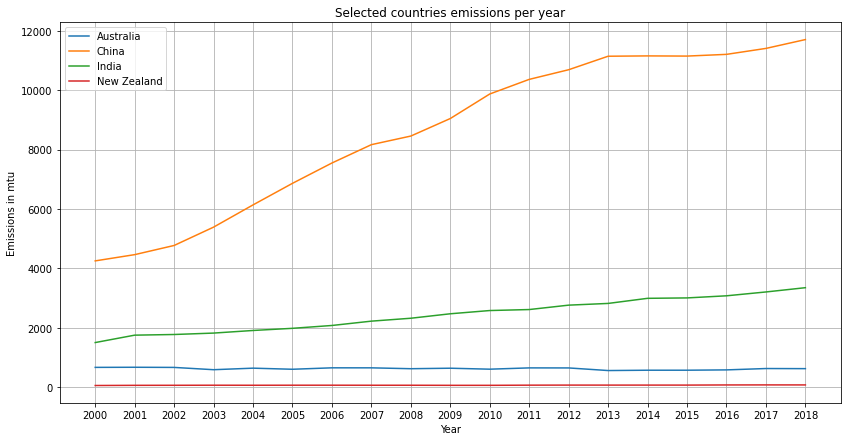

In [15]:
plt.figure(figsize = (14,7))
sns.lineplot(data = by_country_emissions_df, dashes = False)
plt.xlabel('Year')
plt.ylabel('Emissions in mtu')
plt.title('Selected countries emissions per year')
plt.legend()
plt.grid()

In [16]:
top_countries = by_country_emissions.groupby(by = 'Country').sum().sort_values(by = 'Emission', ascending = False).head(20)
top_countries.reset_index(drop = False, inplace = True)

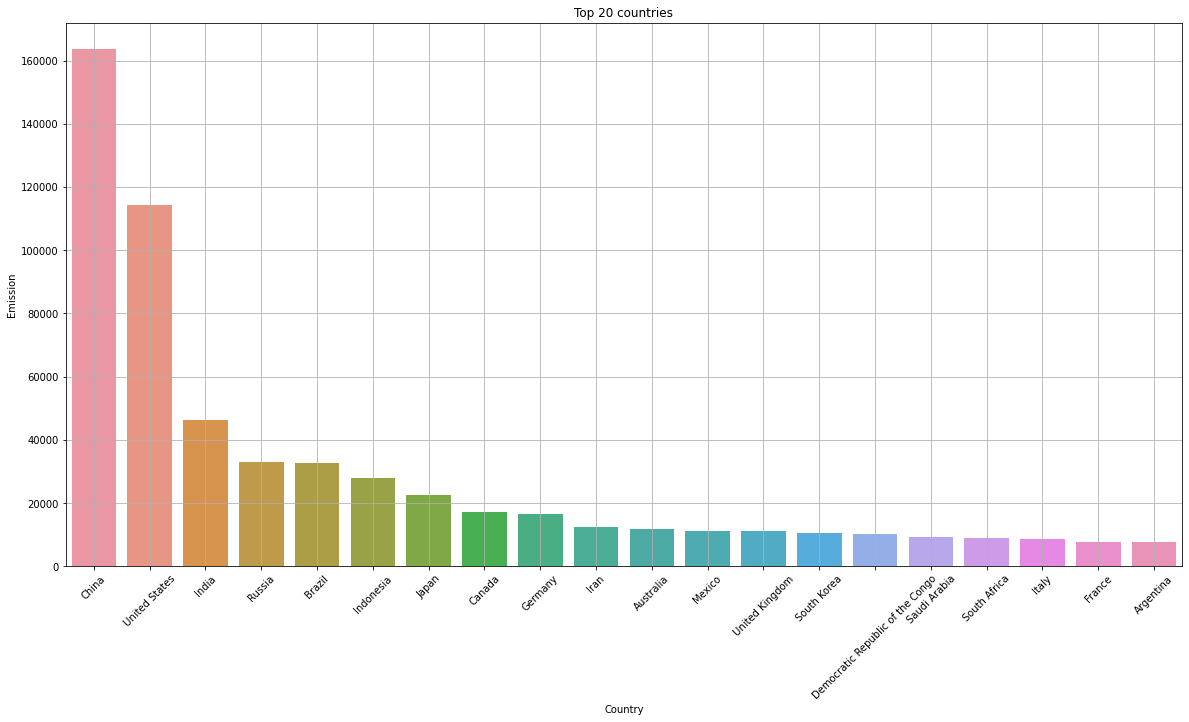

In [17]:
plt.figure(figsize = (20,10))
sns.barplot(data = top_countries, x = 'Country' , y = 'Emission')
plt.xticks(rotation = 45)
plt.title('Top 20 countries')
plt.grid()